In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


<AxesSubplot:xlabel='price', ylabel='area'>

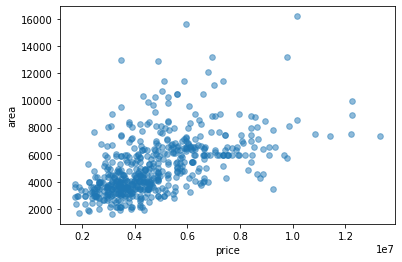

In [8]:
df.plot(kind = 'scatter', x='price', y='area', s=32, alpha = 0.5)

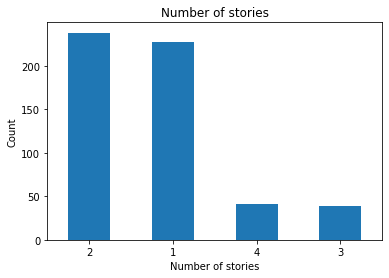

In [9]:
stories = df['stories'].value_counts()
stories

stories.plot(kind='bar')
plt.title('Number of stories')
plt.xlabel('Number of stories')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

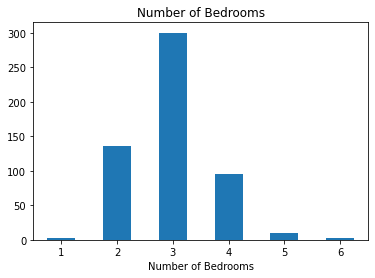

In [10]:
bedroom = df['bedrooms'].value_counts().sort_index()
bedroom.plot(kind='bar')
plt.title('Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.xticks(rotation=0)
plt.show()

In [11]:
for i in range(10):
    print(df.iloc[i])

price                13300000
area                     7420
bedrooms                    4
bathrooms                   2
stories                     3
mainroad                  yes
guestroom                  no
basement                   no
hotwaterheating            no
airconditioning           yes
parking                     2
prefarea                  yes
furnishingstatus    furnished
Name: 0, dtype: object
price                12250000
area                     8960
bedrooms                    4
bathrooms                   4
stories                     4
mainroad                  yes
guestroom                  no
basement                   no
hotwaterheating            no
airconditioning           yes
parking                     3
prefarea                   no
furnishingstatus    furnished
Name: 1, dtype: object
price                     12250000
area                          9960
bedrooms                         3
bathrooms                        2
stories                          2

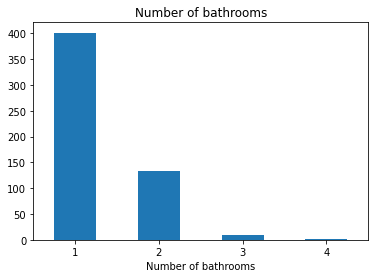

In [12]:
bathrooms = df['bathrooms'].value_counts().sort_index()
bathrooms.plot(kind='bar')
plt.title('Number of bathrooms')
plt.xlabel('Number of bathrooms')
plt.xticks(rotation=0)
plt.show()

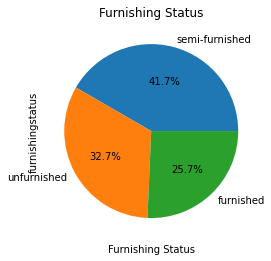

In [13]:
furnishingstatus = df['furnishingstatus'].value_counts()
furnishingstatus.plot(kind='pie', autopct = '%1.1f%%')
plt.title('Furnishing Status')
plt.xlabel('Furnishing Status')
plt.xticks(rotation=0)
plt.show()

In [14]:
encoder = LabelEncoder()

In [17]:
encode = ['furnishingstatus', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

In [18]:
for col in encode:
    df[col] = encoder.fit_transform(df[col])

In [19]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [24]:
x = df.drop('price', axis=1)
y = df['price']

In [26]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [27]:
x

array([[ 1.04672629,  1.40341936,  1.42181174, ...,  1.51769249,
         1.80494113, -1.40628573],
       [ 1.75700953,  1.40341936,  5.40580863, ...,  2.67940935,
        -0.55403469, -1.40628573],
       [ 2.21823241,  0.04727831,  1.42181174, ...,  1.51769249,
         1.80494113, -0.09166185],
       ...,
       [-0.70592066, -1.30886273, -0.57018671, ..., -0.80574124,
        -0.55403469,  1.22296203],
       [-1.03338891,  0.04727831, -0.57018671, ..., -0.80574124,
        -0.55403469, -1.40628573],
       [-0.5998394 ,  0.04727831, -0.57018671, ..., -0.80574124,
        -0.55403469,  1.22296203]])

In [30]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y.values.reshape(-1, 1))

In [31]:
x

array([[0.39656357, 0.6       , 0.33333333, ..., 0.66666667, 1.        ,
        0.        ],
       [0.5024055 , 0.6       , 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.57113402, 0.4       , 0.33333333, ..., 0.66666667, 1.        ,
        0.5       ],
       ...,
       [0.13539519, 0.2       , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.08659794, 0.4       , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.15120275, 0.4       , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [32]:
y

array([[1.        ],
       [0.90909091],
       [0.90909091],
       [0.90606061],
       [0.83636364],
       [0.78787879],
       [0.72727273],
       [0.72727273],
       [0.7030303 ],
       [0.6969697 ],
       [0.6969697 ],
       [0.68666667],
       [0.65454545],
       [0.64848485],
       [0.64848485],
       [0.63636364],
       [0.63636364],
       [0.62424242],
       [0.61818182],
       [0.61515152],
       [0.60606061],
       [0.6       ],
       [0.5969697 ],
       [0.5969697 ],
       [0.59090909],
       [0.58787879],
       [0.58121212],
       [0.57575758],
       [0.57575758],
       [0.57575758],
       [0.57575758],
       [0.57575758],
       [0.56666667],
       [0.55757576],
       [0.55151515],
       [0.54813333],
       [0.54484848],
       [0.53939394],
       [0.53787879],
       [0.53333333],
       [0.53030303],
       [0.52727273],
       [0.51515152],
       [0.51515152],
       [0.5030303 ],
       [0.5030303 ],
       [0.5       ],
       [0.496

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [34]:
linear_model = LinearRegression()

In [36]:
linear_model.fit(x_train, y_train)

LinearRegression()

In [38]:
yPrediction = linear_model.predict(x_test)

In [39]:
Acurracy = r2_score(y_test, yPrediction)

In [40]:
Acurracy

0.6494754192267793